# K-Nearest-Neighbors (KNN)

## Task Description

In this exercise, your task is to use KNN to do regression and classification.

1. Regression:

    Train two KNN regression models. One with uniform weights and one with distance weights.

    Compare the results of the two models for different values of k.

1. Classification:

    Train two KNN classification models. One with uniform weights and one with distance weights.

    Compare the results of the two models for different values of k.

1. Classification LDA, QDA:

    Compare 5-nearest neighbors, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and SVM by creating these classifiers and comparing their accuracy for the datasets.

1. Digit-Classification:

    Compare 5-nearest neighbors, LDA, QDA, and SVM by evaluating their accuracy on the digits dataset from scikit-learn.

In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA,
)
from sklearn.base import RegressorMixin, ClassifierMixin, BaseEstimator

In [2]:
def load_data(name):
    data = np.load(name)
    X = data[:, :-1]
    y = data[:, -1]

    return (X, y)

In [4]:
def train_evaluate_estimator(
    X_train: ArrayLike,
    X_test: ArrayLike,
    y_train: ArrayLike,
    y_test: ArrayLike,
    classifier: BaseEstimator,
) -> None:
    """Trains and evaluates the performance of an estimator on a dataset.

    Args:
        X_train (ArrayLike): The training data.
        X_test (ArrayLike): The test data.
        y_train (ArrayLike): The training labels.
        y_test (ArrayLike): The test labels.
        classifier (BaseEstimator): The estimator to evaluate.
    """

    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    print(f"Train score: {train_score:.3f}")
    print(f"Test score: {test_score:.3f}")

    return classifier

## KNN regression

In [5]:
def add_regression_plot(X: ArrayLike, y: ArrayLike, model: RegressorMixin, ax) -> None:
    """Plot regression model.

    Args:
        X (ArrayLike): The input data.
        y (ArrayLike): The target values.
        model (RegressorMixin): Regression model to plot.
        ax: The axis to plot on.
    """
    plot_interval = np.linspace(np.floor(np.min(X)), np.ceil(np.max(X)), 200)

    ax.plot(X, y, ".", color="#1E88E5")
    ax.plot(plot_interval, model.predict(plot_interval.reshape(-1, 1)), color="#D81B60")

k=1
Uniform weights
Train score: 1.000
Test score: 0.871
Distance weights
Train score: 1.000
Test score: 0.871
k=2
Uniform weights
Train score: 0.964
Test score: 0.899
Distance weights
Train score: 1.000
Test score: 0.891
k=4
Uniform weights
Train score: 0.921
Test score: 0.850
Distance weights
Train score: 1.000
Test score: 0.873
k=8
Uniform weights
Train score: 0.847
Test score: 0.729
Distance weights
Train score: 1.000
Test score: 0.826
k=16
Uniform weights
Train score: 0.703
Test score: 0.467
Distance weights
Train score: 1.000
Test score: 0.723
k=32
Uniform weights
Train score: 0.370
Test score: 0.193
Distance weights
Train score: 1.000
Test score: 0.650


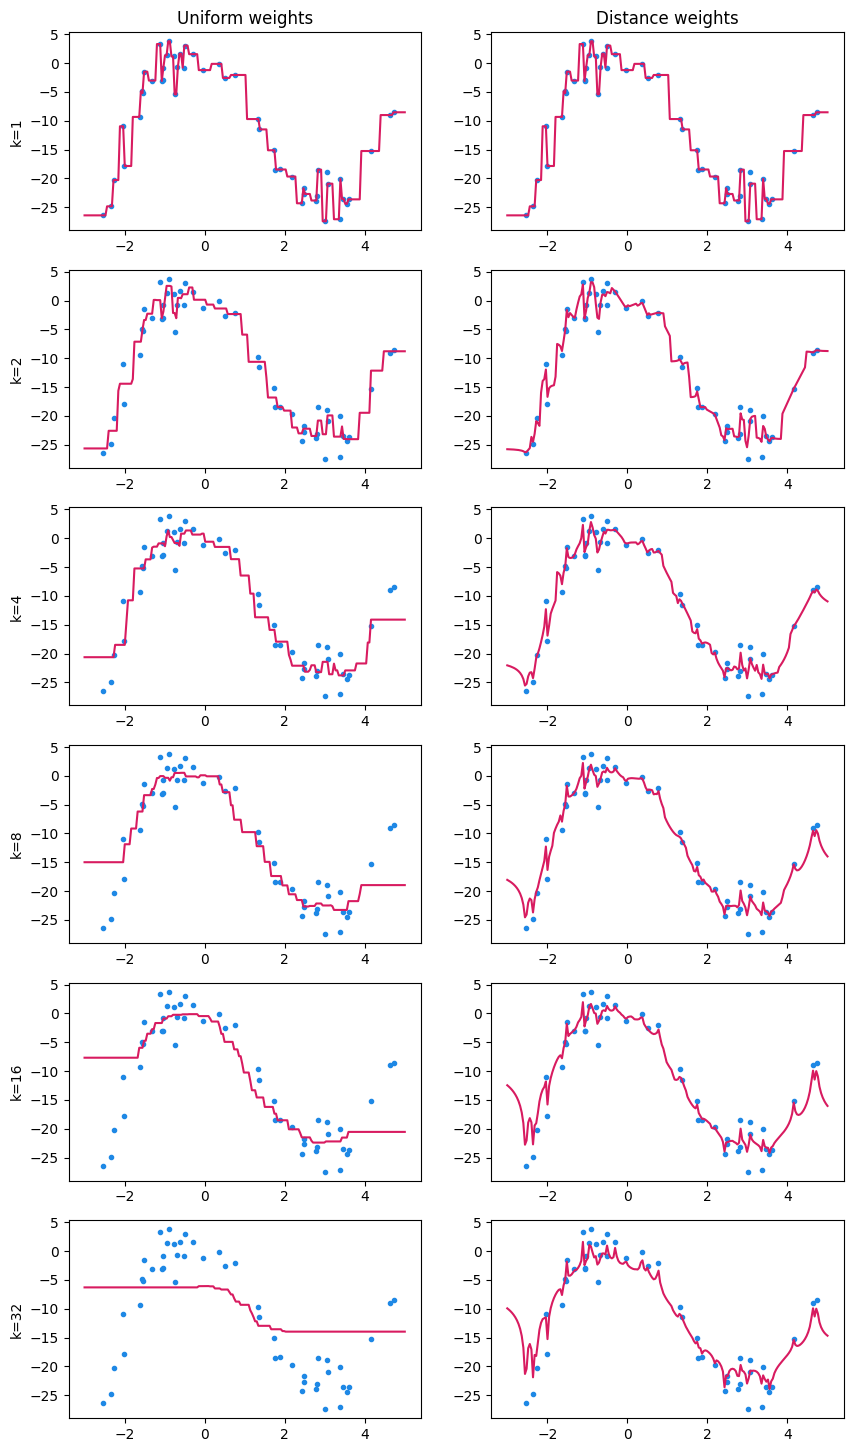

In [7]:
X_train, y_train = load_data("dataset_regression_train.npy")
X_test, y_test = load_data("dataset_regression_test.npy")

k_values = [1, 2, 4, 8, 16, 32]

(fig, axs) = plt.subplots(nrows=len(k_values), ncols=2, figsize=(10, len(k_values) * 3))

for axs_row, n_neighbors in zip(axs, k_values):
    print("=" * 20)
    print(f"k={n_neighbors}")
    print("=" * 20)

    # TODO:
    # Train and evaluate two K-Nearest Neighbors Regressors for each value of k (n_neighbors).
    # One with uniform weights and one with distance weights.

    print("Uniform weights")
    neigh_unif = KNeighborsRegressor(
        n_neighbors=n_neighbors, weights="uniform"
    )
    neigh_unif = train_evaluate_estimator(
        X_train, X_test, y_train, y_test, neigh_unif
    )

    print("Distance weights")
    neigh_dist = KNeighborsRegressor(
        n_neighbors=n_neighbors, weights="distance"
    )
    neigh_dist = train_evaluate_estimator(
        X_train, X_test, y_train, y_test, neigh_dist
    )

    add_regression_plot(X_train, y_train, neigh_unif, axs_row[0])
    add_regression_plot(X_train, y_train, neigh_dist, axs_row[1])

    axs_row[0].set_ylabel(f"k={n_neighbors}")

axs[0, 0].set_title("Uniform weights")
axs[0, 1].set_title("Distance weights")
plt.show()

## KNN classification

In [8]:
def add_classification_plot(
    X: ArrayLike, y: ArrayLike, classifier: ClassifierMixin, ax
) -> None:
    """Plot classification model.

    Args:
        X (ArrayLike): The input data.
        y (ArrayLike): The target labels.
        classifier (ClassifierMixin): The classifier to plot.
        ax (_type_): The axis to plot on.
    """
    for i, color in zip(set(y), ["#D81B60", "#1E88E5"]):
        ax.plot(X[y == i][:, 0], X[y == i][:, 1], ".", color=color)

    gridX, gridY = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 30),
    )
    Z = classifier.predict(np.c_[gridX.ravel(), gridY.ravel()])
    ax.contourf(gridX, gridY, Z.reshape(gridY.shape), alpha=0.2)

Dataset E
k=1
Uniform weights
Train score: 1.000
Test score: 0.920
Distance weights
Train score: 1.000
Test score: 0.920
k=2
Uniform weights
Train score: 0.958
Test score: 0.930
Distance weights
Train score: 1.000
Test score: 0.920
k=4
Uniform weights
Train score: 0.950
Test score: 0.940
Distance weights
Train score: 1.000
Test score: 0.910
k=8
Uniform weights
Train score: 0.940
Test score: 0.930
Distance weights
Train score: 1.000
Test score: 0.930
k=16
Uniform weights
Train score: 0.940
Test score: 0.920
Distance weights
Train score: 1.000
Test score: 0.930
k=32
Uniform weights
Train score: 0.945
Test score: 0.930
Distance weights
Train score: 1.000
Test score: 0.930


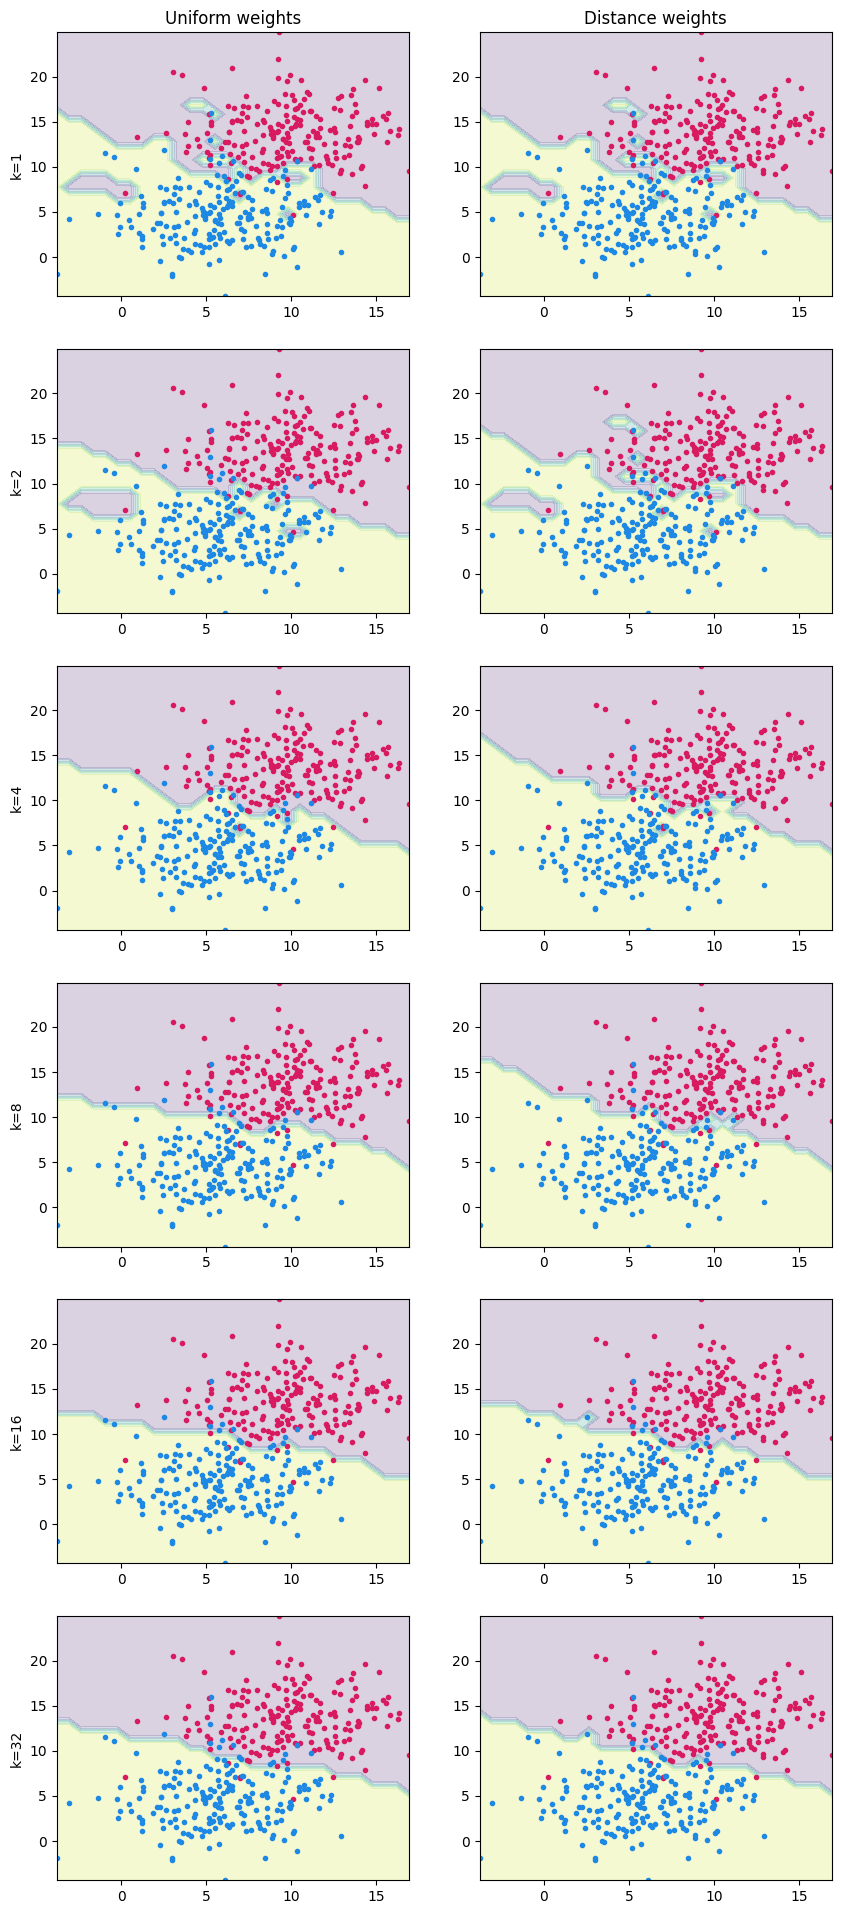

Dataset G
k=1
Uniform weights
Train score: 1.000
Test score: 0.880
Distance weights
Train score: 1.000
Test score: 0.880
k=2
Uniform weights
Train score: 0.922
Test score: 0.880
Distance weights
Train score: 1.000
Test score: 0.880
k=4
Uniform weights
Train score: 0.927
Test score: 0.890
Distance weights
Train score: 1.000
Test score: 0.900
k=8
Uniform weights
Train score: 0.920
Test score: 0.910
Distance weights
Train score: 1.000
Test score: 0.900
k=16
Uniform weights
Train score: 0.920
Test score: 0.900
Distance weights
Train score: 1.000
Test score: 0.900
k=32
Uniform weights
Train score: 0.917
Test score: 0.920
Distance weights
Train score: 1.000
Test score: 0.910


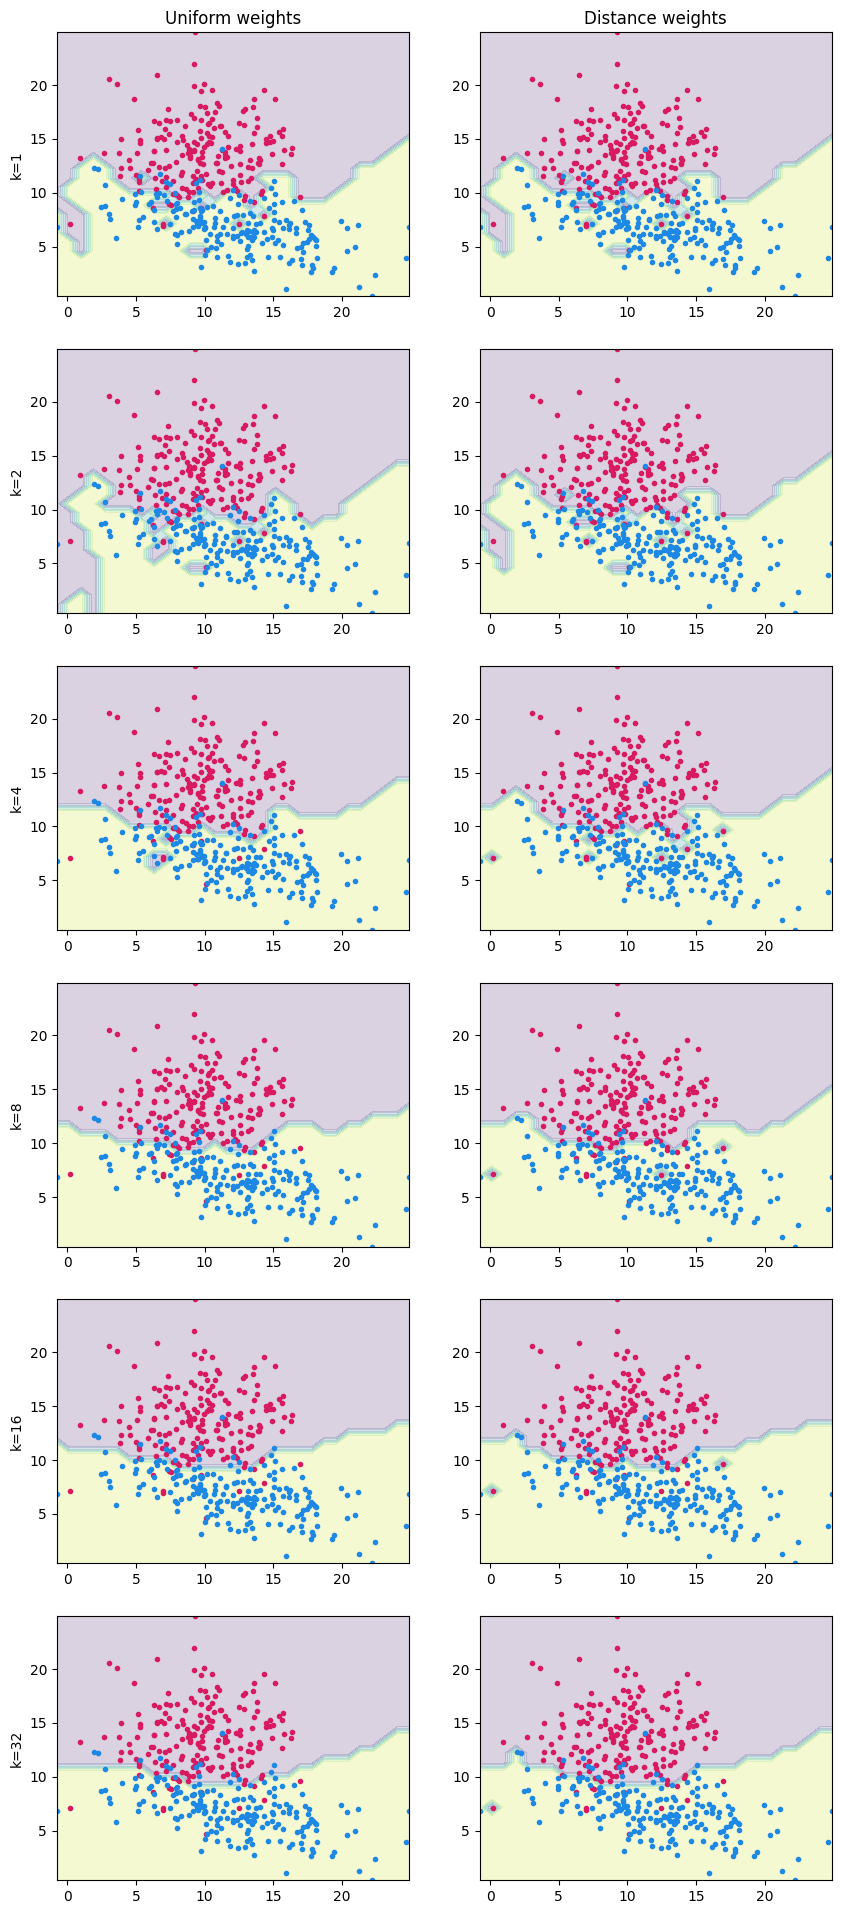

Dataset O
k=1
Uniform weights
Train score: 1.000
Test score: 0.840
Distance weights
Train score: 1.000
Test score: 0.840
k=2
Uniform weights
Train score: 0.950
Test score: 0.860
Distance weights
Train score: 1.000
Test score: 0.840
k=4
Uniform weights
Train score: 0.945
Test score: 0.880
Distance weights
Train score: 1.000
Test score: 0.860
k=8
Uniform weights
Train score: 0.935
Test score: 0.800
Distance weights
Train score: 1.000
Test score: 0.800
k=16
Uniform weights
Train score: 0.920
Test score: 0.780
Distance weights
Train score: 1.000
Test score: 0.780
k=32
Uniform weights
Train score: 0.910
Test score: 0.800
Distance weights
Train score: 1.000
Test score: 0.820


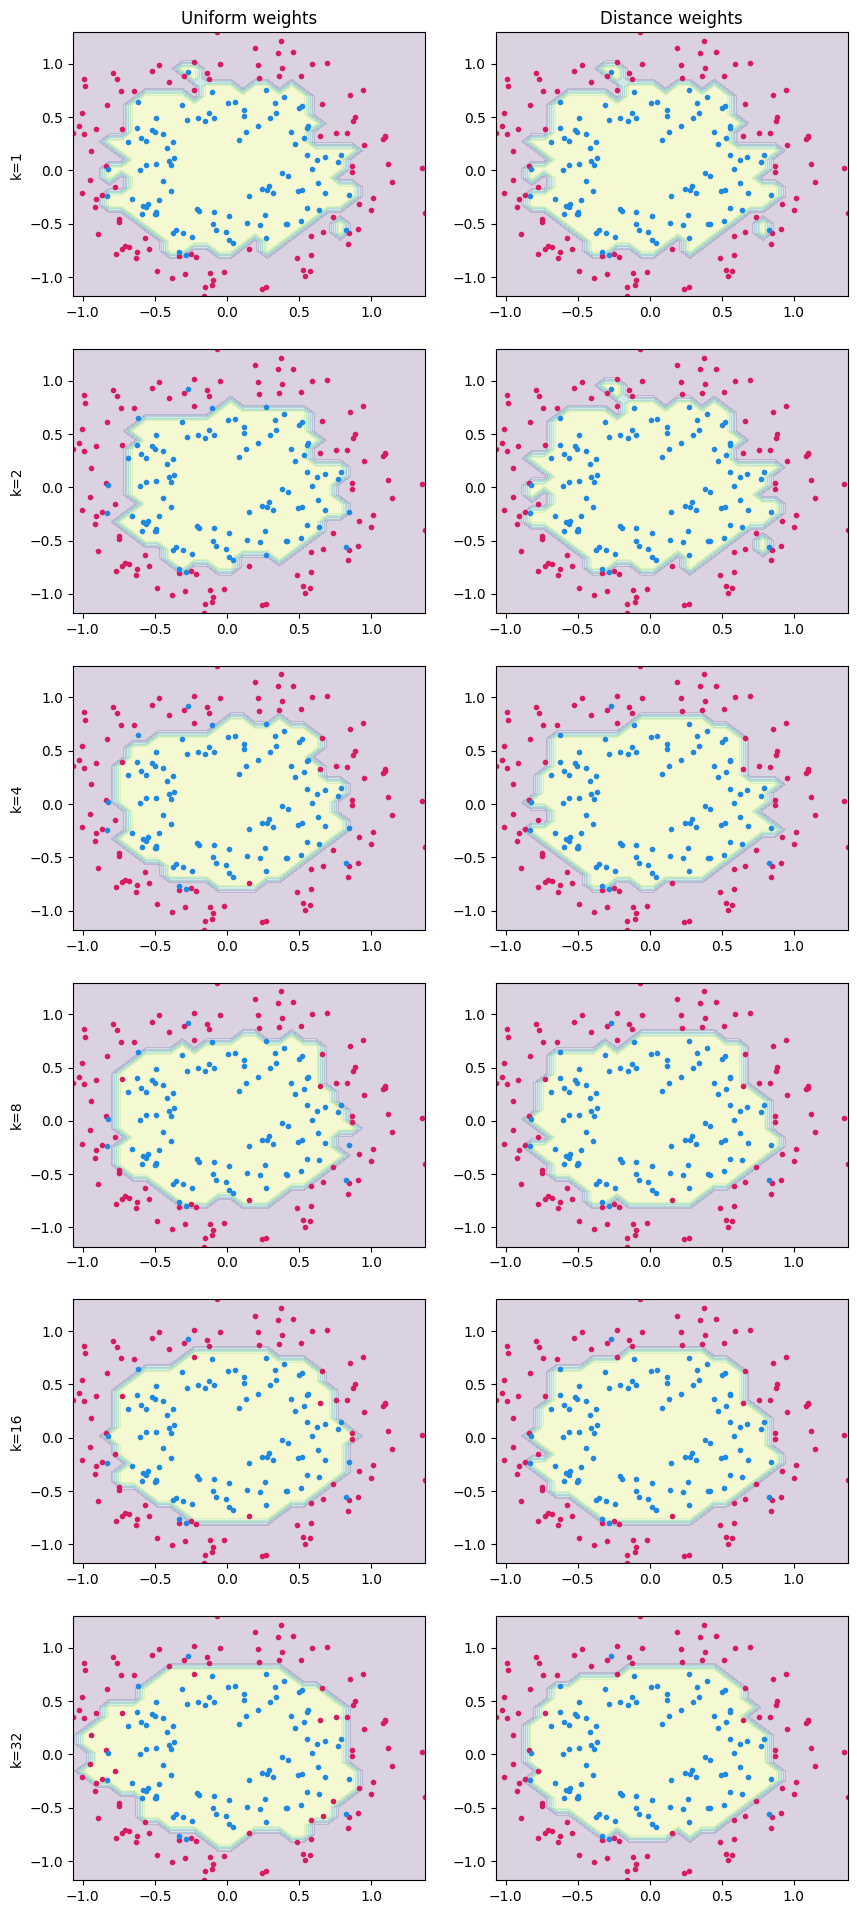

In [9]:
datasets = ["E", "G", "O"]

k_values = [1, 2, 4, 8, 16, 32]

for dataset in datasets:
    print("=" * 20)
    print(f"Dataset {dataset}")
    print("=" * 20)

    X_train, y_train = load_data(f"dataset_{dataset}_train.npy")
    X_test, y_test = load_data(f"dataset_{dataset}_test.npy")

    (fig, axs) = plt.subplots(
        nrows=len(k_values), ncols=2, figsize=(10, len(k_values) * 4)
    )

    for ax_row, n_neighbors in zip(axs, k_values):
        print("=" * 20)
        print(f"k={n_neighbors}")
        print("=" * 20)

        # TODO:
        # Train and evaluate two K-Nearest Neighbors Classifiers for each value of k (n_neighbors).
        # One with uniform weights and one with distance weights.

        print("Uniform weights")
        neigh_unif = KNeighborsClassifier(
            n_neighbors=n_neighbors, weights="uniform"
        )
        neigh_unif = train_evaluate_estimator(
            X_train, X_test, y_train, y_test, neigh_unif
        )

        print("Distance weights")
        neigh_dist = KNeighborsClassifier(
            n_neighbors=n_neighbors, weights="distance"
        )
        neigh_dist = train_evaluate_estimator(
            X_train, X_test, y_train, y_test, neigh_dist
        )

        add_classification_plot(X_train, y_train, neigh_unif, ax_row[0])
        add_classification_plot(X_train, y_train, neigh_dist, ax_row[1])

        ax_row[0].set_ylabel(f"k={n_neighbors}")

    axs[0, 0].set_title("Uniform weights")
    axs[0, 1].set_title("Distance weights")
    plt.show()

## Classification - LDA - QDA

In [ ]:
# TODO: Compare the performance of K-Nearest Neighbors, LDA, QDA and SVM classifiers on the datasets.

classifiers = [
    KNeighborsClassifier(n_neighbors=1, weights="uniform"),
    KNeighborsClassifier(n_neighbors=1, weights="distance"),
    LDA(),
    QDA(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
]

(fig, axs) = plt.subplots(nrows=len(datasets), ncols=len(classifiers), figsize=(16, 12))

for i, dataset in enumerate(datasets):
    print("=" * 20)
    print(f"Dataset {dataset}")
    print("=" * 20)

    X_train, y_train = load_data(f"dataset_{dataset}_train.npy")
    X_test, y_test = load_data(f"dataset_{dataset}_test.npy")

    for j, classifier in enumerate(classifiers):
        print(classifier.__class__.__name__)

        # TODO: Train the classifier train and evaluate the classifier on the dataset.

        if i == 0:
            axs[i][j].set_title(classifier.__class__.__name__)
        add_classification_plot(X_train, y_train, classifier, ax=axs[i][j])

        print()
    
    axs[i][0].set_ylabel(f"Dataset {dataset}")

plt.show()

## KNN classification - digits

In [ ]:
def plot_digits(numb: ArrayLike, tag: ArrayLike) -> None:
    """Plots an example of each digit from the dataset.

    Args:
        numb (ArrayLike): The dataset containing the images of the digits.
        tag (ArrayLike): The labels for the images in the dataset.
    """
    example_digits = [numb[tag == i][0] for i in range(10)]

    _, axs = plt.subplots(nrows=2, ncols=5)

    for ax, digit in zip(axs.flatten(), example_digits):
        ax.imshow(digit.reshape(8, 8), cmap="gray", vmin=0, vmax=16)

    plt.show()

In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=66
)

plot_digits(X, y)

for classifier in classifiers:
    print(classifier.__class__.__name__)

    # TODO: Train the classifier train and evaluate the classifier on the dataset.

    classifier = train_evaluate_estimator(X_train, X_test, y_train, y_test, classifier)

    print()